In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pd.pandas.set_option('display.max_columns',None)

In [38]:
dataset = pd.read_csv('housing.csv')
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [39]:
##list of features which have missing values

features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>1]

##print feature name and percentage of missing values

for feature in features_with_na:
    print(feature, np.round(dataset[feature].isnull().mean(),4), '% missing values')

total_bedrooms 0.01 % missing values


## Relationship between missing values and sales price

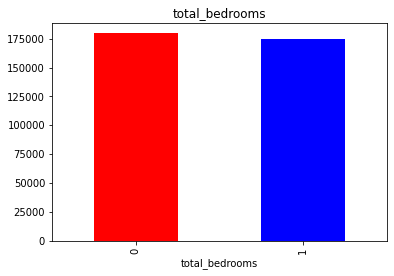

In [40]:
for feature in features_with_na:
    data=dataset.copy()
    
    #this will indicate 1 if observation was missing or 0 if not
    data[feature]=np.where(data[feature].isnull(), 1, 0)
    
    #calculate mean sales price where data is missing
    data.groupby(feature)['median_house_value'].median().plot.bar(color=['red', 'blue'])
    plt.title(feature)
    plt.show()

In [41]:
#list of numerical variables

numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))
dataset[numerical_features].head()

Number of numerical variables:  9


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [42]:
## Numerical variables are usually of 2 types:
# Continuous variable and Discrete variable

discrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<25 ]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 0


In [43]:
# Continuous Variable

continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature count {}".format(len(continuous_feature)))

Continuous feature count 9


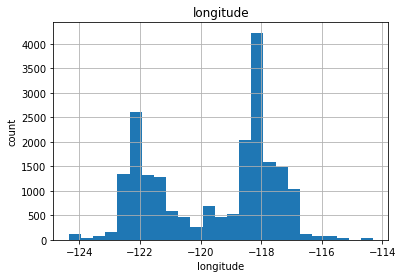

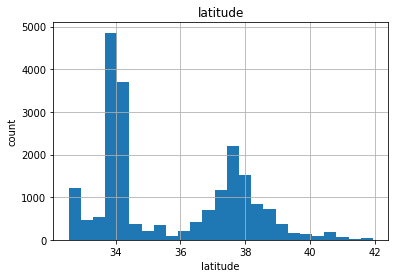

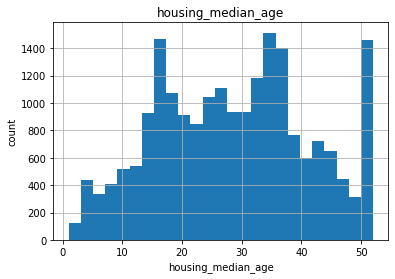

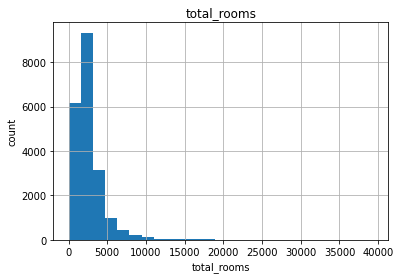

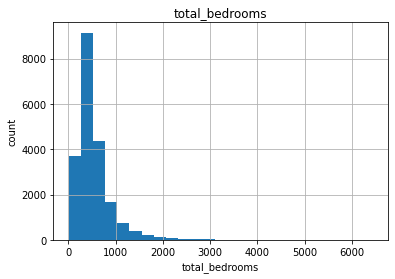

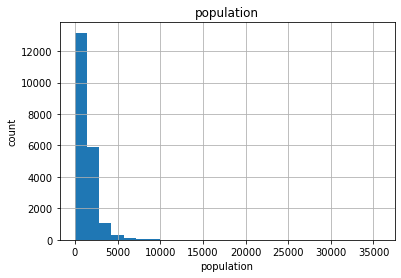

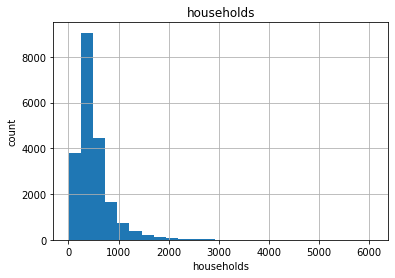

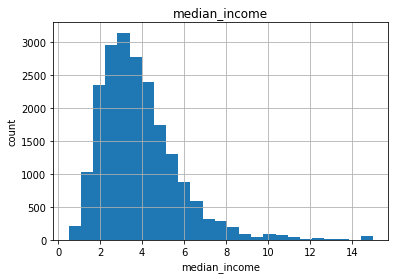

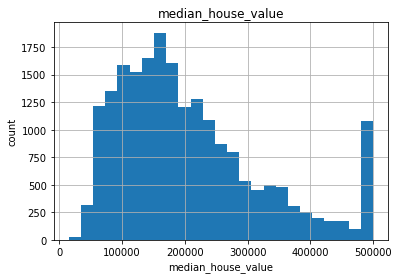

In [24]:
#Analyse continuous variable by creating histograms

for feature in continuous_feature:
    data=dataset.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("count")
    plt.title(feature)
    plt.show()

/home/ajay/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


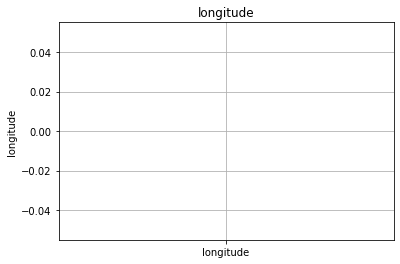

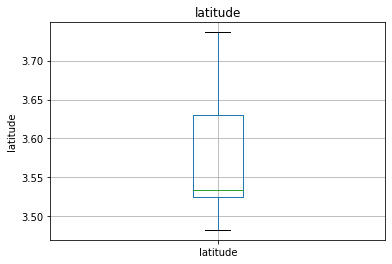

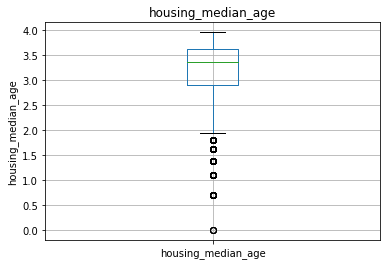

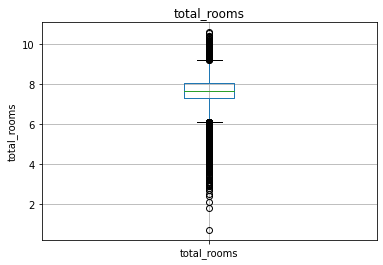

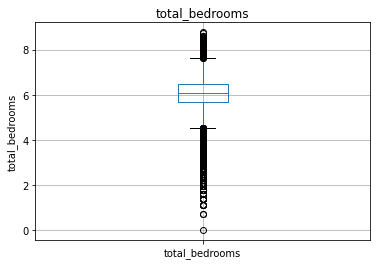

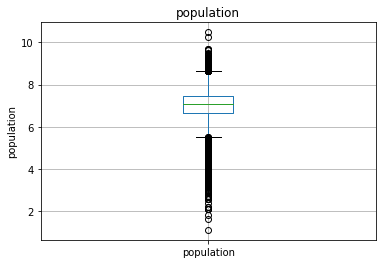

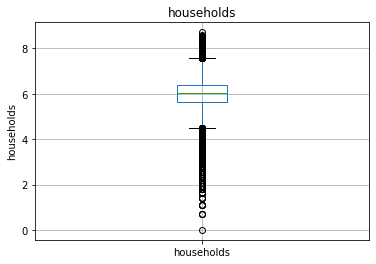

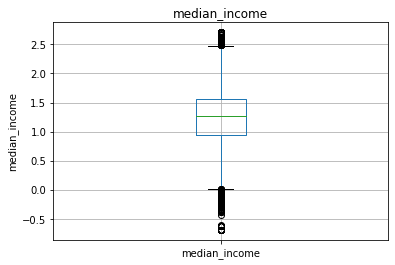

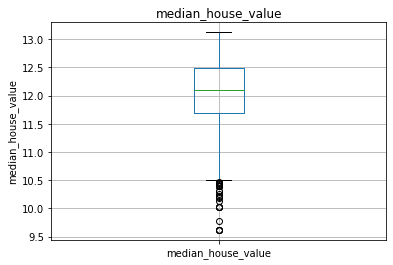

In [13]:
##Only for continuous variable, can't be used for categorical variable

for feature in continuous_feature:
    data = dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()
        

In [44]:
categorical_features=[feature for feature in dataset.columns if data[feature].dtypes=='O']
categorical_features

['ocean_proximity']

In [45]:
dataset[categorical_features].head()

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY


In [46]:
for feature in categorical_features:
    print('The feature is {} and the number of categories are {}'.format(feature,len(dataset[feature].unique())))

The feature is ocean_proximity and the number of categories are 5


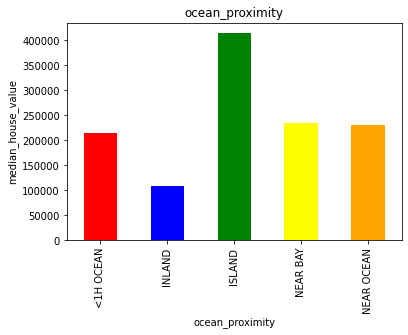

In [47]:
## Find out the relationship between categorical variable and dependent feature

for feature in categorical_features:
    data=dataset.copy()
    data.groupby(feature)['median_house_value'].median().plot.bar(color=['red', 'blue', 'green', 'yellow', 'orange'])
    plt.xlabel(feature)
    plt.ylabel('median_house_value')
    plt.title(feature)
    plt.show()

## Handle Missing Values

In [48]:
#Replace the missing nan values

for feature in features_with_na:
     ##We will replace by using median
    median_value = dataset[feature].median()
    print(median_value)
    ##create a new feature to capture nan values
    dataset[feature+'nan'] = np.where(dataset[feature].isnull(), 1, 0)
    dataset[feature].fillna(median_value, inplace = True)

dataset[features_with_na].isnull().sum()

435.0


total_bedrooms    0
dtype: int64

In [49]:
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_bedroomsnan
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0


## Handling Rare Categorical Feature

In [50]:
temp=dataset.groupby(categorical_features)['median_house_value'].count()/len(dataset)
print(temp)
temp_df=temp[temp>0.01].index
print(temp_df)
dataset[categorical_features]=np.where(dataset[categorical_features].isin(temp_df),dataset[categorical_features],'Rare_var')

ocean_proximity
<1H OCEAN     0.442636
INLAND        0.317393
ISLAND        0.000242
NEAR BAY      0.110950
NEAR OCEAN    0.128779
Name: median_house_value, dtype: float64
Index(['<1H OCEAN', 'INLAND', 'NEAR BAY', 'NEAR OCEAN'], dtype='object', name='ocean_proximity')


In [51]:
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_bedroomsnan
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0


In [52]:
for feature in categorical_features:
    labels_ordered=dataset.groupby(feature)['median_house_value'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    dataset[feature]=dataset[feature].map(labels_ordered)


## Correlation

In [53]:
dataset.head()
dataset.drop(['total_bedroomsnan'], axis = 1)
dataset.iloc[:,0:].corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_bedroomsnan
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069120,0.099773,0.055310,-0.015176,-0.045967,-0.271730,0.004880
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066484,-0.108785,-0.071035,-0.079809,-0.144160,0.007695,-0.006325
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.319026,-0.296244,-0.302916,-0.119034,0.105623,0.295012,0.005047
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927058,0.857126,0.918484,0.198050,0.134153,-0.031586,-0.003375
total_bedrooms,0.069120,-0.066484,-0.319026,0.927058,1.000000,0.873535,0.974366,-0.007617,0.049457,-0.010067,-0.024441
population,0.099773,-0.108785,-0.296244,0.857126,0.873535,1.000000,0.907222,0.004834,-0.024650,-0.039415,0.004648
households,0.055310,-0.071035,-0.302916,0.918484,0.974366,0.907222,1.000000,0.013033,0.065843,0.012873,0.002760
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007617,0.004834,0.013033,1.000000,0.688075,0.163755,-0.002566
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049457,-0.024650,0.065843,0.688075,1.000000,0.397251,-0.000740
ocean_proximity,-0.271730,0.007695,0.295012,-0.031586,-0.010067,-0.039415,0.012873,0.163755,0.397251,1.000000,0.004100


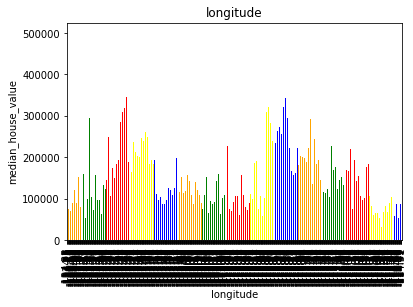

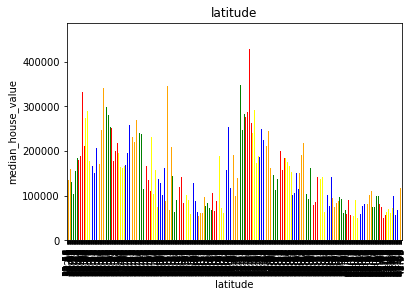

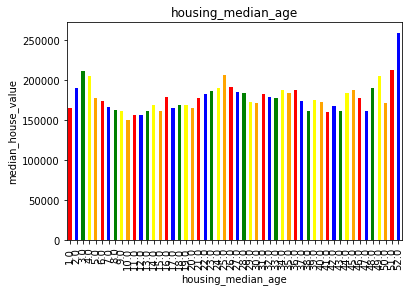

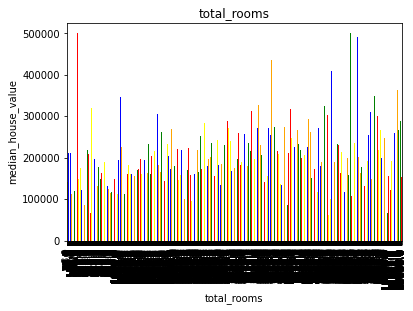

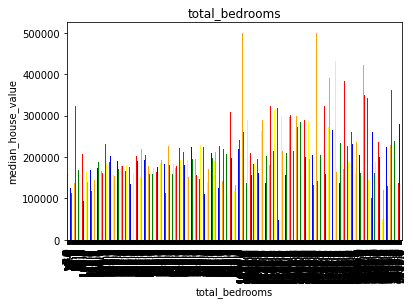

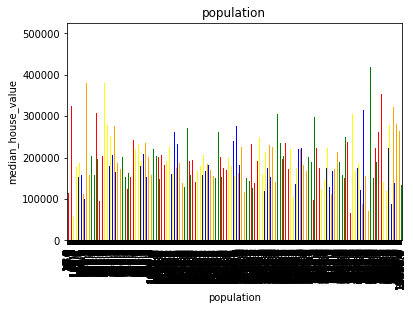

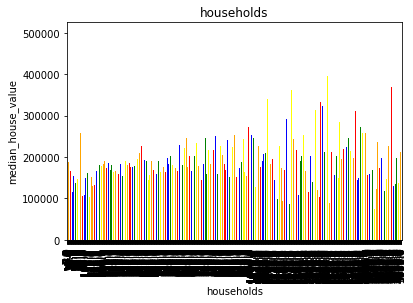

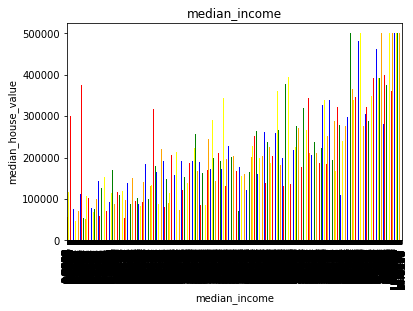

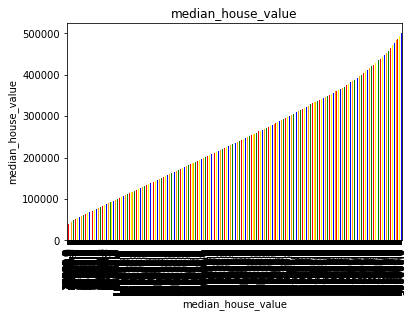

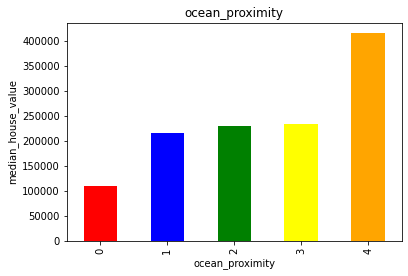

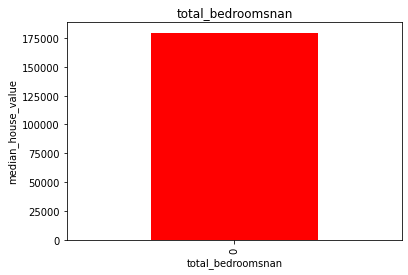

In [31]:
for feature in dataset.columns:
    data=dataset.copy()
    data.groupby(feature)['median_house_value'].median().plot.bar(color=['red', 'blue', 'green', 'yellow', 'orange'])
    plt.xlabel(feature)
    plt.ylabel('median_house_value')
    plt.title(feature)
    plt.show()

In [54]:
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,total_bedroomsnan
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3,0


In [55]:
dataset=dataset.drop('total_bedroomsnan', axis=1)

In [56]:
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3


## Removing Outliers

In [79]:
from scipy import stats
z=np.abs(stats.zscore(dataset))
print(z)

[[1.32783522 1.05254828 0.98214266 ... 2.34476576 2.12963148 2.08278032]
 [1.32284391 1.04318455 0.60701891 ... 2.33223796 1.31415614 2.08278032]
 [1.33282653 1.03850269 1.85618152 ... 1.7826994  1.25869341 2.08278032]
 ...
 [0.8237132  1.77823747 0.92485123 ... 1.14259331 0.99274649 1.09543835]
 [0.87362627 1.77823747 0.84539315 ... 1.05458292 1.05860847 1.09543835]
 [0.83369581 1.75014627 1.00430931 ... 0.78012947 1.01787803 1.09543835]]


In [81]:
#print(np.where(z>5))
data_load=dataset[(z<=5).all(axis=1)]
data_load.shape

(20389, 10)

In [82]:
X = data_load.iloc[:,:]
y = data_load.iloc[:,8]
X=X.drop('median_house_value', axis=1)

In [83]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,3
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,0


In [84]:
# There can be a possibility of data leakage so we will split first and then apply feature engineering

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)


In [85]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18350, 9), (2039, 9), (18350,), (2039,))

## Feature Scaling 

In [86]:
feature_scale=[feature for feature in dataset.columns if feature not in ['median_house_value']]
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


In [87]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

lin_regressor = LinearRegression()
#parameters = {'alpha':[30, 35,36,37,38,39, 40, 45], 'max_iter':[1700]}
#lin_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
mse = cross_val_score(lin_regressor, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=5)
mean_mse = np.mean(mse)
print(mean_mse)
lin_regressor.fit(X_train_scaled, y_train)
#print(lin_regressor.best_params_) #best_params_ gives which lambda value was more suitable
#print(lin_regressor.best_score_)
acc=lin_regressor.score(X_test_scaled, y_test)
print('acc: {}'.format(int(round(acc*100))))
preds = lin_regressor.predict(X_test_scaled)
preds.shape

-4663906371.810341
acc: 69


(2039,)

(19268.28672889285, 1052161.6472174812, 89125.0938133746, 1122018.4543019629)

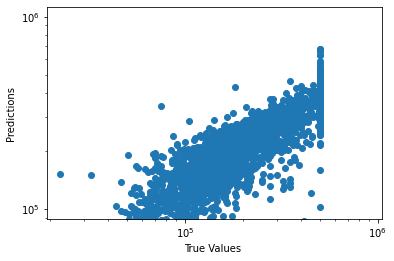

In [77]:
g=plt.scatter(y_test, preds)
g.axes.set_yscale('log')
g.axes.set_xscale('log')
g.axes.set_xlabel('True Values ')
g.axes.set_ylabel('Predictions ')
g.axes.axis('equal')
g.axes.axis('square')

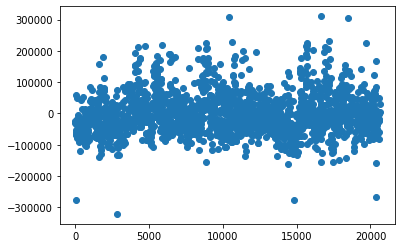

In [88]:
g=plt.plot(y_test - preds,marker='o',linestyle='')


In [89]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(y_test, preds)
print(error)
from sklearn.metrics import r2_score
error_r2 = r2_score(y_test, preds)
print(error_r2)

4179141506.2497606
0.6884471468162805


/home/ajay/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='median_house_value', ylabel='Density'>

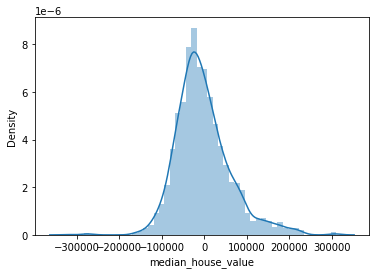

In [91]:
import seaborn as sns

sns.distplot(y_test-preds)

## Lasso Regression

In [101]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters = {'alpha':[0.01]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train_scaled,y_train)
print(lasso_regressor.best_params_) #best_params_ gives which lambda value was more suitable
print(lasso_regressor.best_score_)


{'alpha': 0.01}
-4663906322.237854


/home/ajay/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='median_house_value', ylabel='Density'>

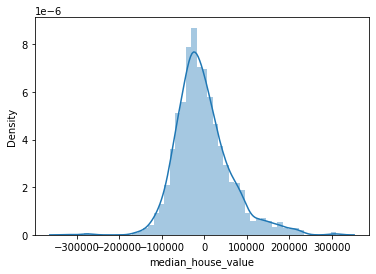

In [102]:
preds1 = lasso_regressor.predict(X_test_scaled)
sns.distplot(y_test-preds1)

In [103]:
from sklearn.metrics import mean_squared_error
error1 = mean_squared_error(y_test, preds1)
print(error1)
from sklearn.metrics import r2_score
error_r21 = r2_score(y_test, preds1)
print(error_r21)

4179141368.9669023
0.6884471570506471


## Ridge Regression

In [104]:
from sklearn.linear_model import Ridge


ridge = Ridge()
parameters = {'alpha':[1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train_scaled,y_train)
preds2=ridge_regressor.predict(X_test_scaled)


/home/ajay/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='median_house_value', ylabel='Density'>

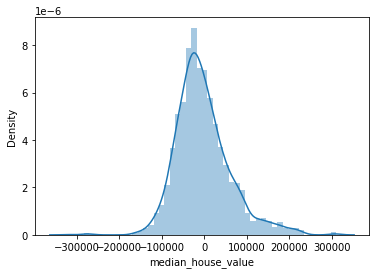

In [105]:
sns.distplot(y_test-preds2)

In [106]:
error2 = mean_squared_error(y_test, preds2)
print(error2)
error_r22 = r2_score(y_test, preds2)
print(error_r22)

4179139602.4184217
0.6884472887459292


## Random Forest Regressor

In [139]:
from sklearn.ensemble import RandomForestRegressor
#from sklearn.datasets import make_regression
regressor = RandomForestRegressor(n_estimators = 200, random_state = 0, n_jobs=4)
regressor.fit(X_train_scaled, y_train)


RandomForestRegressor(n_estimators=200, n_jobs=4, random_state=0)

In [140]:
preds3=regressor.predict(X_test_scaled)

/home/ajay/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='median_house_value', ylabel='Density'>

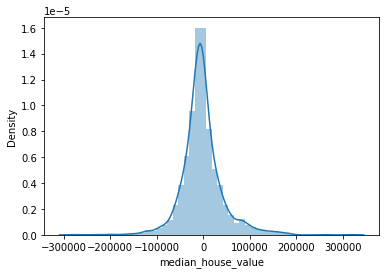

In [141]:
sns.distplot(y_test-preds3)

In [142]:
error3 = mean_squared_error(y_test, preds3)
print(error3)
error_r23 = r2_score(y_test, preds3)
print(error_r23)

1968372414.2669005
0.8532588473312325


## XGBOOST Regressor

In [112]:
import xgboost as xg
xgb_r = xg.XGBRegressor(learning_rate=0.15, num_parallel_tree= 2, n_estimators=150, max_depth=15, objective ='reg:linear', reg_lambda= 2, seed = 123)
xgb_r.fit(X_train_scaled, y_train)

[17:40:45] WARNING: ../src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.15, max_delta_step=0, max_depth=15,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=150, n_jobs=4, num_parallel_tree=2,
             objective='reg:linear', random_state=123, reg_alpha=0,
             reg_lambda=2, scale_pos_weight=1, seed=123, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [113]:
preds4 = xgb_r.predict(X_test_scaled)

/home/ajay/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='median_house_value', ylabel='Density'>

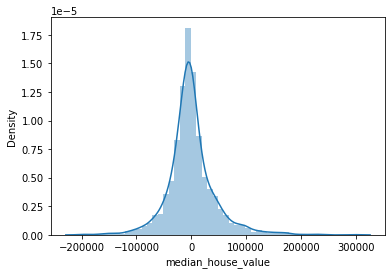

In [114]:
sns.distplot(y_test-preds4)

In [115]:
error4 = mean_squared_error(y_test, preds4)
print(error4)
error_r24 = r2_score(y_test, preds4)
print(error_r24)

1925151774.992755
0.856480923794101
